In [28]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

In [3]:
nw = pypsa.Network("/Users/nomio/Documents/Research/Fall_2324/pypsa-usa-n/workflow/results/western/networks/elec_s_30_ec_lv1.25_Co2L0.75.nc")

INFO:pypsa.io:Imported network elec_s_30_ec_lv1.25_Co2L0.75.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [38]:
nw.loads

,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
0 0 AC,0 0,AC,,0.0,0.0,-1.0
AVA0 0 AC,AVA0 0,AC,,0.0,0.0,-1.0
Arizona0 0 AC,Arizona0 0,AC,,0.0,0.0,-1.0
BANC0 0 AC,BANC0 0,AC,,0.0,0.0,-1.0
BPAT0 0 AC,BPAT0 0,AC,,0.0,0.0,-1.0
CHPD0 0 AC,CHPD0 0,AC,,0.0,0.0,-1.0
CISO-PGAE0 0 AC,CISO-PGAE0 0,AC,,0.0,0.0,-1.0
CISO-SCE0 0 AC,CISO-SCE0 0,AC,,0.0,0.0,-1.0
CISO-SCE0 1 AC,CISO-SCE0 1,AC,,0.0,0.0,-1.0


<Axes: xlabel='snapshot'>

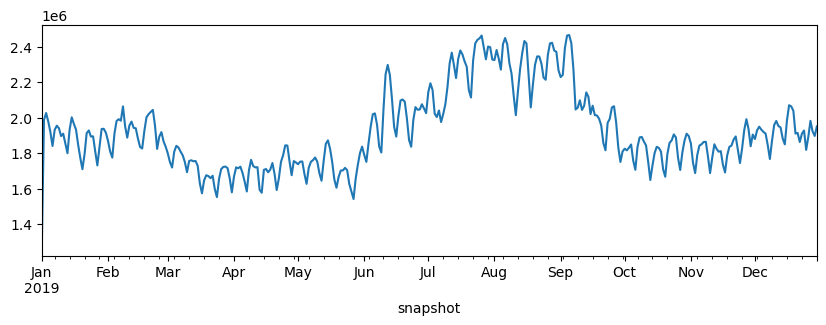

In [67]:
# Model demand
model_demand = nw.loads_t.p.sum(axis=1).resample('D').sum()
plt.figure(figsize=(10, 3))
model_demand.plot()

In [66]:
nw.loads_t.keys()

dict_keys(['p_set', 'q_set', 'p', 'q'])

In [52]:
# Historic demand
csv_path_1 = "/Users/nomio/Documents/Research/Fall_2324/pypsa-usa-n/workflow/resources/eia/6moFiles/EIA930_BALANCE_2019_Jan_Jun.csv"
csv_path_2 = "/Users/nomio/Documents/Research/Fall_2324/pypsa-usa-n/workflow/resources/eia/6moFiles/EIA930_BALANCE_2019_Jul_Dec.csv"
selected_cols = ["Balancing Authority", "UTC Time at End of Hour", "Demand (MW) (Adjusted)"]
historic_first = pd.read_csv(
        csv_path_1,
        index_col=[0, 1],
        header=0,
        parse_dates=True,
        date_format="%m/%d/%Y %I:%M:%S %p",
        usecols=selected_cols,
    )
historic_second = pd.read_csv(
        csv_path_2,
        index_col=[0, 1],
        header=0,
        parse_dates=True,
        date_format="%m/%d/%Y %I:%M:%S %p",
        usecols=selected_cols,
    )
historic_first_df = (
        historic_first.loc[buses].fillna(0).replace({",": ""}, regex=True).astype(float)
    )
historic_second_df = (
    historic_second.loc[buses].fillna(0).replace({",": ""}, regex=True).astype(float)
)
historic = (
        pd.concat([historic_first_df, historic_second_df], axis=0)
        .groupby(["UTC Time at End of Hour"])
        .sum()
    )
historic

/var/folders/5m/65dpkd513dd24d_lyyxsb5hr0000gn/T/ipykernel_66024/2400552639.py:5: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/5m/65dpkd513dd24d_lyyxsb5hr0000gn/T/ipykernel_66024/2400552639.py:13: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



,Demand (MW) (Adjusted)
UTC Time at End of Hour,
2019-01-01 08:00:00,25298.0
2019-01-01 09:00:00,75086.0
2019-01-01 10:00:00,73603.0
2019-01-01 11:00:00,72701.0
2019-01-01 12:00:00,72690.0
...,...
2020-01-01 04:00:00,85128.0
2020-01-01 05:00:00,82410.0
2020-01-01 06:00:00,79442.0


In [53]:
model_demand

snapshot
2019-01-01    1282929.0
2019-01-02    1986958.0
2019-01-03    2026483.0
2019-01-04    1978897.0
2019-01-05    1919066.0
                ...    
2019-12-26    1891299.0
2019-12-27    1982269.0
2019-12-28    1923217.0
2019-12-29    1897262.0
2019-12-30    1950985.0
Freq: D, Length: 364, dtype: float64

<Axes: xlabel='UTC Time at End of Hour'>

<Figure size 1000x300 with 0 Axes>

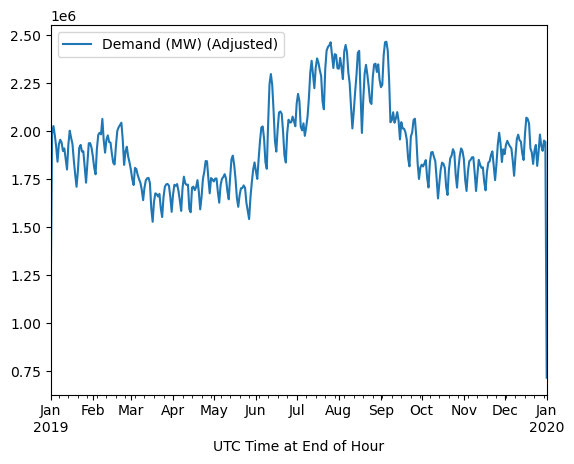

In [54]:
fig,ax
plt.figure(figsize=(10, 3))
historic.resample('D').sum().plot()

In [32]:
buses = []
for i in range(nw.generators.bus.size):
    if nw.generators.bus[i] not in buses:
        buses.append(nw.generators.bus[i])
buses_clean = [ba.split("0")[0] for ba in buses]
buses_clean = [ba.split("-")[0] for ba in buses_clean]
buses = list(OrderedDict.fromkeys(buses_clean))
buses.pop(1)
buses += ["SRP", "AZPS"]
buses

['AVA',
 'BANC',
 'BPAT',
 'CHPD',
 'CISO',
 'DOPD',
 'EPE',
 'GCPD',
 'GRID',
 'IID',
 'IPCO',
 'LDWP',
 'NEVP',
 'NWMT',
 'PACE',
 'PACW',
 'PGE',
 'PNM',
 'PSCO',
 'PSEI',
 'TEPC',
 'TIDC',
 'WACM',
 'WALC',
 'WAUW',
 'SRP',
 'AZPS']

In [69]:
historic.sum()/1e9

Demand (MW) (Adjusted)    0.702417
dtype: float64

In [70]:
model_demand.sum()/1e9

0.701555696

<Axes: xlabel='snapshot'>

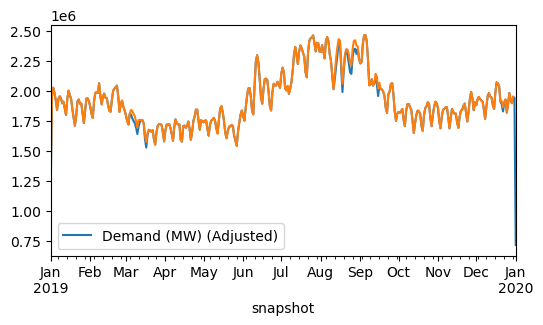

In [71]:
fig, axis = plt.subplots(figsize=(6, 3))
historic.resample('D').sum().plot(ax=axis)
model_demand.plot(ax=axis)

In [72]:
# print out mean errors
# look into individual bas - 
model_demand

snapshot
2019-01-01    1282929.0
2019-01-02    1986958.0
2019-01-03    2026483.0
2019-01-04    1978897.0
2019-01-05    1919066.0
                ...    
2019-12-26    1891299.0
2019-12-27    1982269.0
2019-12-28    1923217.0
2019-12-29    1897262.0
2019-12-30    1950985.0
Freq: D, Length: 364, dtype: float64